0                                                    90%
1                                                    70%
2                                                    90%
3                                         Certainty: 90%
4                                                    70%
                             ...                        
204                                                  90%
205    90% certainty.\nThis statement is true because...
206                                                  90%
207                                                  100
208                                     \nCertainty: 95%
Name: true certainty, Length: 209, dtype: object
Average absolute difference: 10.31791907514451


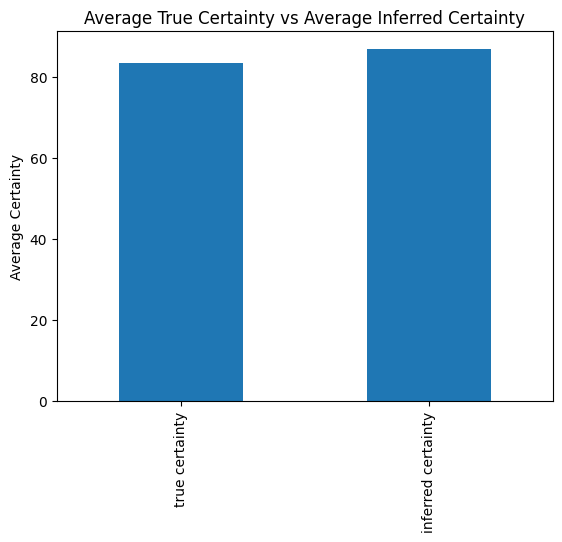

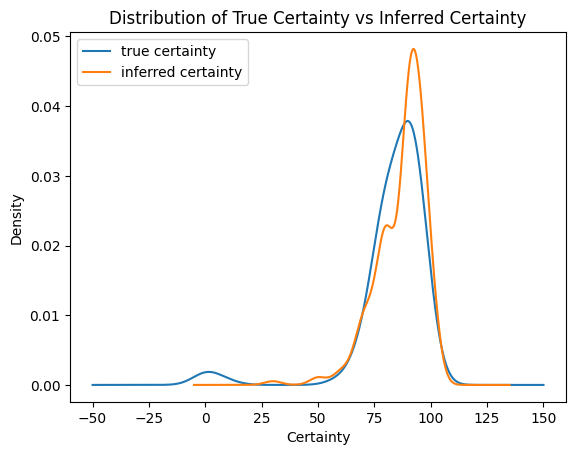

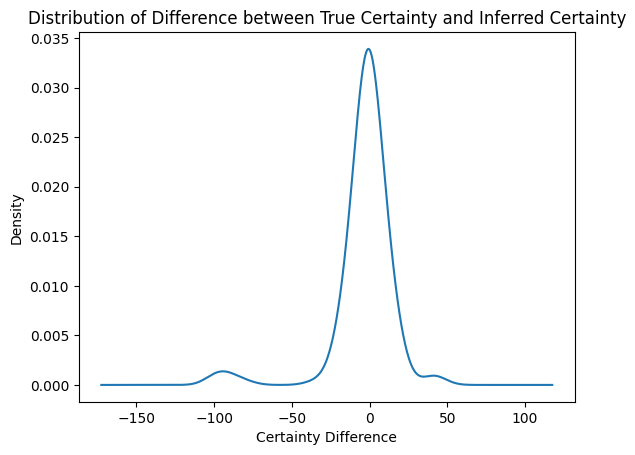

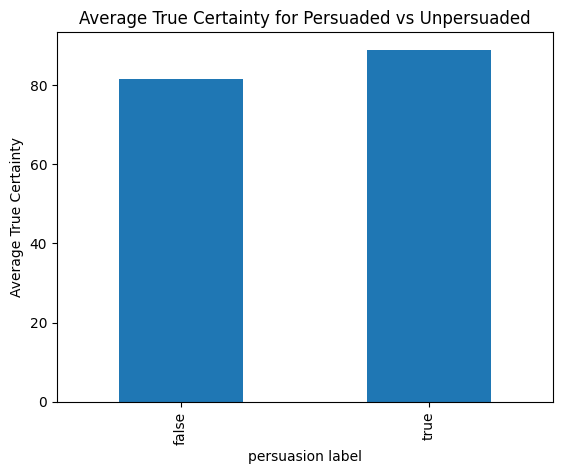

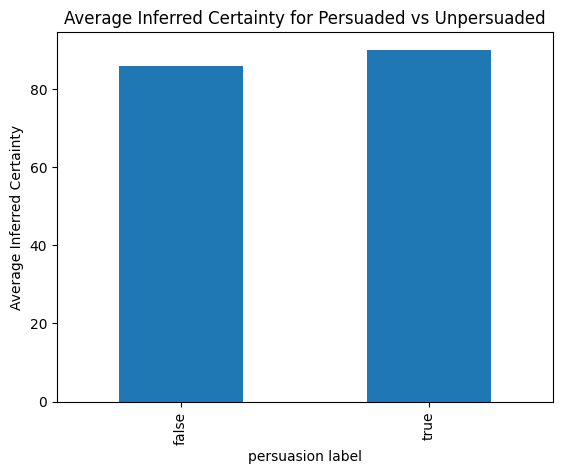

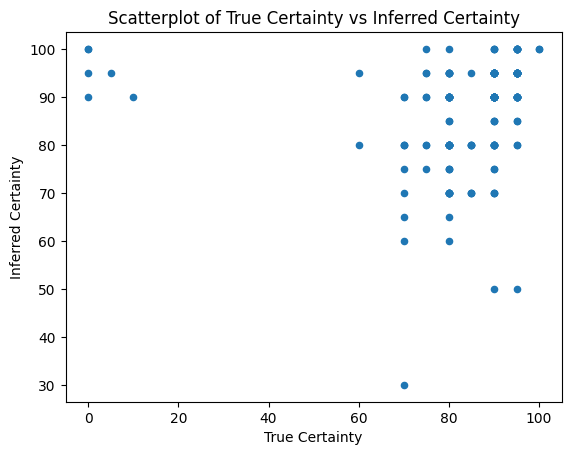

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the evaluated responses from the JSON file
with open('LIAR-Evaluated.json', 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

print(df['true certainty'])

# Extract numeric part and remove '%' character from 'true certainty', then convert to numeric
df['true certainty'] = pd.to_numeric(df['true certainty'].str.extract('(\d+)', expand=False).str.replace('%', ''), errors='coerce')

# Remove all periods from 'inferred certainty', then convert to numeric
df['inferred certainty'] = pd.to_numeric(df['inferred certainty'].str.replace('.', ''), errors='coerce')

# Convert the 'persuasion label' column to lowercase
df['persuasion label'] = df['persuasion label'].str.lower()

# Calculate the difference between true certainty and inferred certainty
df['certainty difference'] = df['true certainty'] - df['inferred certainty']

# Calculate the absolute difference between true certainty and inferred certainty
df['absolute certainty difference'] = abs(df['true certainty'] - df['inferred certainty'])

# Calculate and print the average absolute difference
average_absolute_difference = df['absolute certainty difference'].mean()
print(f"Average absolute difference: {average_absolute_difference}")

# 1. Bar chart comparing the average true certainty with the average inferred certainty
df[['true certainty', 'inferred certainty']].mean().plot(kind='bar')
plt.title('Average True Certainty vs Average Inferred Certainty')
plt.ylabel('Average Certainty')
plt.show()

# 2. Distribution comparing the average true certainty with the average inferred certainty
df[['true certainty', 'inferred certainty']].plot(kind='density')
plt.title('Distribution of True Certainty vs Inferred Certainty')
plt.xlabel('Certainty')
plt.show()

# 3. Distribution of the difference between average true certainty with average inferred certainty
df['certainty difference'].plot(kind='density')
plt.title('Distribution of Difference between True Certainty and Inferred Certainty')
plt.xlabel('Certainty Difference')
plt.show()

# 4. Average true certainty for persuaded vs unpersuaded
df.groupby('persuasion label')['true certainty'].mean().plot(kind='bar')
plt.title('Average True Certainty for Persuaded vs Unpersuaded')
plt.ylabel('Average True Certainty')
plt.show()

# 5. Average inferred certainty for persuaded vs. unpersuaded
df.groupby('persuasion label')['inferred certainty'].mean().plot(kind='bar')
plt.title('Average Inferred Certainty for Persuaded vs Unpersuaded')
plt.ylabel('Average Inferred Certainty')
plt.show()

# Scatterplot between inferred certainty and true certainty
df.plot(kind='scatter', x='true certainty', y='inferred certainty')
plt.title('Scatterplot of True Certainty vs Inferred Certainty')
plt.xlabel('True Certainty')
plt.ylabel('Inferred Certainty')
plt.show()

In [9]:
# Print the total number of data points
print(f"Total data points: {df.shape[0]}")

Total data points: 209


In [10]:
# Calculate the absolute difference between true certainty and inferred certainty
df['absolute certainty difference'] = abs(df['true certainty'] - df['inferred certainty'])

# Calculate and print the average absolute difference
average_absolute_difference = df['absolute certainty difference'].mean()
print(f"Average absolute difference: {average_absolute_difference}")

Average absolute difference: 10.31791907514451


In [12]:
# Print the 'absolute certainty difference' column
print(df['absolute certainty difference'])

0      10.0
1       5.0
2       0.0
3       NaN
4      10.0
       ... 
204     5.0
205     NaN
206    10.0
207     0.0
208     NaN
Name: absolute certainty difference, Length: 209, dtype: float64
